In [272]:
import matplotlib.pyplot as plt
import matplotlib.pylab as P
import pandas as pd
import numpy as np

In [273]:
# Custom function to make graphs simple and pretty

%matplotlib inline

#tell pandas to display wide tables as pretty HTML tables
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

#--------------------------To remove borders from the matplotlib plots-------------------------
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right

In [274]:
train  = pd.read_excel('train.xlsx')

In [275]:
print "Number of rows: %i" % train.shape[0]
train.head()

Number of rows: 3998


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [276]:
train.columns.values

array([u'ID', u'Salary', u'DOJ', u'DOL', u'Designation', u'JobCity',
       u'Gender', u'DOB', u'10percentage', u'10board', u'12graduation',
       u'12percentage', u'12board', u'CollegeID', u'CollegeTier',
       u'Degree', u'Specialization', u'collegeGPA', u'CollegeCityID',
       u'CollegeCityTier', u'CollegeState', u'GraduationYear', u'English',
       u'Logical', u'Quant', u'Domain', u'ComputerProgramming',
       u'ElectronicsAndSemicon', u'ComputerScience', u'MechanicalEngg',
       u'ElectricalEngg', u'TelecomEngg', u'CivilEngg',
       u'conscientiousness', u'agreeableness', u'extraversion',
       u'nueroticism', u'openess_to_experience'], dtype=object)

In [277]:
colids = pd.unique(train.ix[:,'CollegeID'].values.ravel())
colids.shape

(1350,)

In [278]:
train['Salary'].describe()

count       3998.000000
mean      307699.849925
std       212737.499957
min        35000.000000
25%       180000.000000
50%       300000.000000
75%       370000.000000
max      4000000.000000
Name: Salary, dtype: float64

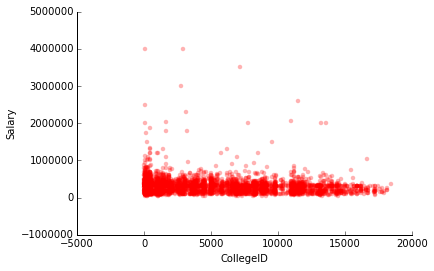

In [279]:
plt.scatter(train['CollegeID'], train['Salary'], lw=0, alpha=.3, color='r')
plt.xlabel("CollegeID")
plt.ylabel("Salary")
remove_border()

In [280]:
train['collegeGPA'].describe()

count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegeGPA, dtype: float64

In [281]:
gpaData = train['collegeGPA']
nrows = len(gpaData)
count=0
i=0
while i<nrows:
    if (gpaData[i]<=10):
        gpaData[i]=gpaData[i]*10
        count=count+1
    i=i+1
count

/home/priyanka/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


12

In [282]:
train['collegeGPA'].describe()

count    3998.000000
mean       71.695728
std         7.406631
min        49.070000
25%        66.505000
50%        71.800000
75%        76.400000
max        99.930000
Name: collegeGPA, dtype: float64

In [283]:
train['collegeGPA']=train['collegeGPA'].round()

In [284]:
pd.unique(train['collegeGPA'].values.ravel()).shape

(52,)

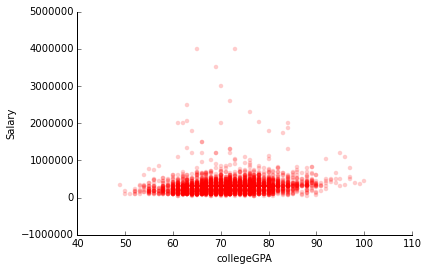

In [285]:
plt.scatter(train['collegeGPA'], train['Salary'], lw=0, alpha=.2, color='r')
plt.xlabel("collegeGPA")
plt.ylabel("Salary")
remove_border()

In [286]:
gpaData[5]

76.0

In [287]:
GPArange =  (train['collegeGPA'] // 10) * 10

tyd = train[['collegeGPA', 'Salary']]
tyd['GPArange'] = GPArange

tyd.head()

/home/priyanka/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,collegeGPA,Salary,GPArange
train,78,420000,70
train,70,500000,70
train,70,325000,70
train,75,1100000,70
train,74,200000,70


In [288]:
pd.unique(tyd['GPArange'].values.ravel())

array([  70.,   80.,   60.,   50.,   90.,  100.,   40.])

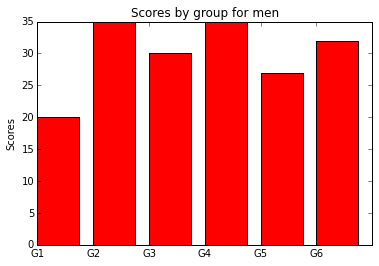

In [289]:
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

N = 6
menMeans = (20, 35, 30, 35, 27, 32)

ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind*0.20, menMeans, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group for men')
ax.set_xticks(ind*0.20)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5','G6'))

plt.show()

In [290]:
pd.unique(train['Designation'].values.ravel()).shape

(419,)

In [291]:
pd.unique(train['JobCity'].values.ravel()).shape

(339,)

In [292]:
pd.unique(train['Designation'].values.ravel())

array([u'senior quality engineer', u'assistant manager',
       u'systems engineer', u'senior software engineer', u'get',
       u'system engineer', u'java software engineer',
       u'mechanical engineer', u'electrical engineer', u'project engineer',
       u'senior php developer', u'senior systems engineer',
       u'quality assurance engineer', u'qa analyst', u'network engineer',
       u'product development engineer', u'associate software developer',
       u'data entry operator', u'software engineer', u'developer',
       u'electrical project engineer', u'programmer analyst',
       u'systems analyst', u'ase', u'telecommunication engineer',
       u'application developer', u'ios developer', u'executive assistant',
       u'online marketing manager', u'documentation specialist',
       u'associate software engineer', u'management trainee',
       u'site manager', u'software developer', u'.net developer',
       u'production engineer', u'jr. software engineer',
       u'trainee soft

In [293]:
pd.unique(train['Gender'].values.ravel()).shape

(2,)

In [294]:
pd.unique(train['Degree'].values.ravel())

array([u'B.Tech/B.E.', u'MCA', u'M.Tech./M.E.', u'M.Sc. (Tech.)'], dtype=object)

In [295]:
pd.unique(train['Specialization'].values.ravel())

array([u'computer engineering',
       u'electronics and communication engineering',
       u'information technology', u'computer science & engineering',
       u'mechanical engineering',
       u'electronics and electrical engineering',
       u'electronics & telecommunications',
       u'instrumentation and control engineering', u'computer application',
       u'electronics and computer engineering', u'electrical engineering',
       u'applied electronics and instrumentation',
       u'electronics & instrumentation eng',
       u'information science engineering', u'civil engineering',
       u'mechanical and automation',
       u'industrial & production engineering',
       u'control and instrumentation engineering',
       u'metallurgical engineering',
       u'electronics and instrumentation engineering',
       u'electronics engineering', u'ceramic engineering',
       u'chemical engineering', u'aeronautical engineering', u'other',
       u'biotechnology', u'embedded systems techn

In [296]:
train['Specialization'].describe()

count                                          3998
unique                                           46
top       electronics and communication engineering
freq                                            880
Name: Specialization, dtype: object

In [297]:
train['Gender'].describe()

count     3998
unique       2
top          m
freq      3041
Name: Gender, dtype: object

In [298]:
train['JobCity'].describe()

count          3998
unique          339
top       Bangalore
freq            627
Name: JobCity, dtype: object

In [299]:
train['Designation'].describe()

count                  3998
unique                  419
top       software engineer
freq                    539
Name: Designation, dtype: object

In [300]:
csList=[]
for word in pd.unique(train['Specialization'].values.ravel()):
    if (word.find("computer")!= -1):
        print(word)
        csList.append(word)

computer engineering
computer science & engineering
computer application
electronics and computer engineering
computer science and technology
computer and communication engineering
computer networking
computer science


In [301]:
csList

[u'computer engineering',
 u'computer science & engineering',
 u'computer application',
 u'electronics and computer engineering',
 u'computer science and technology',
 u'computer and communication engineering',
 u'computer networking',
 u'computer science']

In [302]:
count = 0
for word in train['Specialization']:
    if (word in csList):
        count = count + 1
print(count)

1601


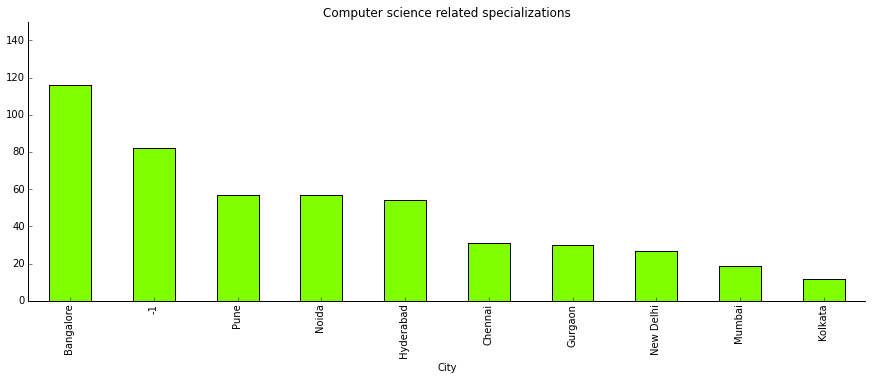

In [303]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,5))

train[train['Specialization'] == ('computer engineering' or 'computer science & engineering' or 
'computer application' or 'electronics and computer engineering' or 'computer science and technology' or 
'computer and communication engineering' or 'computer networking' 
or 'computer science')]['JobCity'].value_counts()[:10].plot(kind="bar", color='chartreuse')
plt.ylim([0,150])
axes.set_xlabel('City')
axes.set_title('Computer science related specializations')
remove_border()

In [304]:
pd.unique(train['JobCity'].values.ravel())

array([u'Bangalore', u'Indore', u'Chennai', u'Gurgaon', u'Manesar',
       u'Hyderabad', u'Banglore', u'Noida', u'Kolkata', u'Pune', -1,
       u'mohali', u'Jhansi', u'Delhi', u'Hyderabad ', u'Bangalore ',
       u'noida', u'delhi', u'Bhubaneswar', u'Navi Mumbai', u'Mumbai',
       u'New Delhi', u'Mangalore', u'Rewari', u'Gaziabaad', u'Bhiwadi',
       u'Mysore', u'Rajkot', u'Greater Noida', u'Jaipur', u'noida ',
       u'HYDERABAD', u'mysore', u'THANE', u'Maharajganj',
       u'Thiruvananthapuram', u'Punchkula', u'Bhubaneshwar', u'Pune ',
       u'coimbatore', u'Dhanbad', u'Lucknow', u'Trivandrum', u'kolkata',
       u'mumbai', u'Gandhi Nagar', u'Una', u'Daman and Diu', u'chennai',
       u'GURGOAN', u'vsakhapttnam', u'pune', u'Nagpur', u'Bhagalpur',
       u'new delhi - jaisalmer', u'Coimbatore', u'Ahmedabad',
       u'Kochi/Cochin', u'Bankura', u'Bengaluru', u'Mysore ', u'Kanpur ',
       u'jaipur', u'Gurgaon ', u'bangalore', u'CHENNAI', u'Vijayawada',
       u'Kochi', u'Beawar', u'

we observe that 'Bangalore' itself has been manifested in several ways namely:
'Bangalore '
'bangalore'
'bangalore '
' bangalore'
'banglore' 
'BAngalore'
'BANGALORE'
'BANGALORE '
'BANGLORE'
'Banglore '

So the first task is to reassign all these city names as 'Bangalore'

In [310]:
bloreList = ['Bangalore ','bangalore','bangalore ',' bangalore','banglore' ,'BAngalore','BANGALORE','BANGALORE ',
             'BANGLORE','Banglore ','Banagalore']

count = 0
for city in train['JobCity']:
    if (city in bloreList):
        city = 'Bangalore'
        count = count+1
print(count)

#train['JobCity'] = ['Bangalore' for train['JobCity'] in bloreList]

44


In [320]:
def replace_all(text, word):
    for t in text:
        replace(t,word)

words = ['hi', 'bye', 'no', 'hi']
words = [replace_all(['hi','no','bye'], 'hello') for w in words]
words

AttributeError: 'str' object has no attribute 'replace_all'

In [306]:
train['Specialization'].values

array([u'computer engineering',
       u'electronics and communication engineering',
       u'information technology', ..., u'computer engineering',
       u'computer science & engineering', u'information technology'], dtype=object)

In [307]:
if 'computer sciences' in csList:
    print 'yes'

In [308]:
'computer science' in csList

True

In [309]:
train['Specialization'] == ('computer engineering' or 'computer science & engineering' or 
'computer application' or 'electronics and computer engineering' or 'computer science and technology' or 
'computer and communication engineering' or 'computer networking' or 'computer science')

train     True
train    False
train    False
train     True
train    False
train    False
train    False
train    False
train    False
train    False
train     True
train    False
train    False
train    False
train    False
train    False
train    False
train    False
train    False
train     True
train     True
train    False
train    False
train    False
train    False
train    False
train     True
train    False
train    False
train    False
         ...  
train     True
train    False
train    False
train    False
train    False
train    False
train    False
train    False
train    False
train    False
train    False
train     True
train    False
train    False
train    False
train    False
train     True
train     True
train    False
train    False
train    False
train    False
train    False
train    False
train    False
train    False
train    False
train     True
train    False
train    False
Name: Specialization, dtype: bool